In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### DATA EXPLORATION

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(df.shape)
print('======================================')
print(df.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
print('Duplicated values: ',df.duplicated().sum())
print('======================================')
# Check missing values:
col_zeroes=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in col_zeroes:
    df[i].replace(0,np.NaN,inplace=True)
df.info()

Duplicated values:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


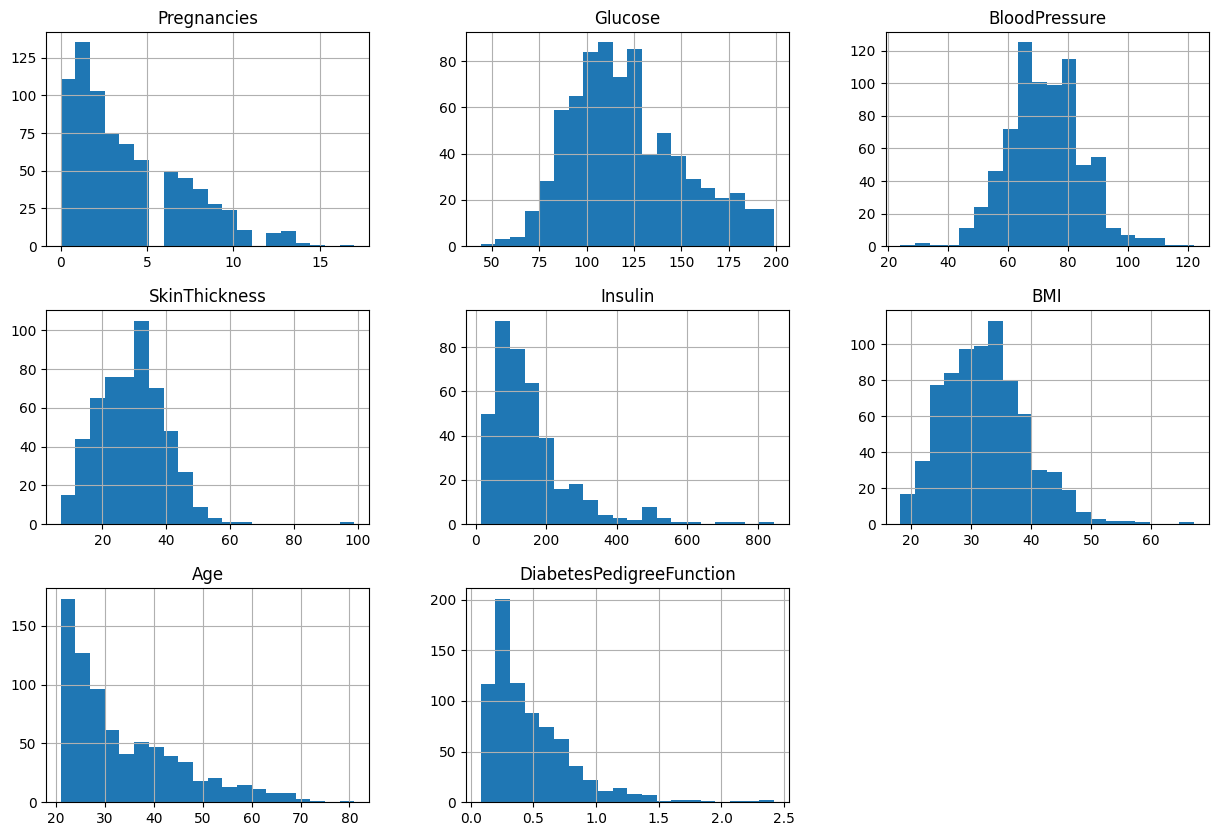

In [6]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']
df[cols].hist(bins=20, figsize=(15, 10))
plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


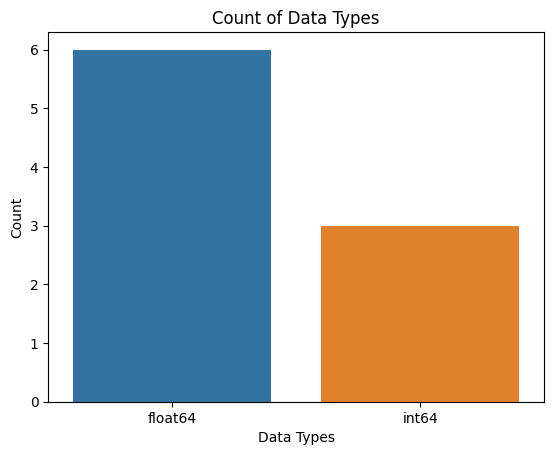

In [8]:
data_types_count = df.dtypes.value_counts()
sns.barplot(x=data_types_count.index, y=data_types_count.values)
plt.title('Count of Data Types')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.show()

In [9]:
df = df.astype(float)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


#### Impute missing values

In [10]:
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


#### Data Exploration using histograms, scatterplots and heatmaps

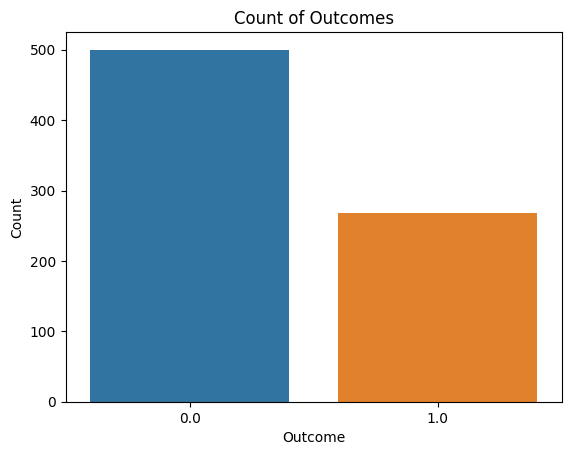

In [11]:
outcome_count = df['Outcome'].value_counts()
sns.barplot(x=outcome_count.index, y=outcome_count.values)
plt.title('Count of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

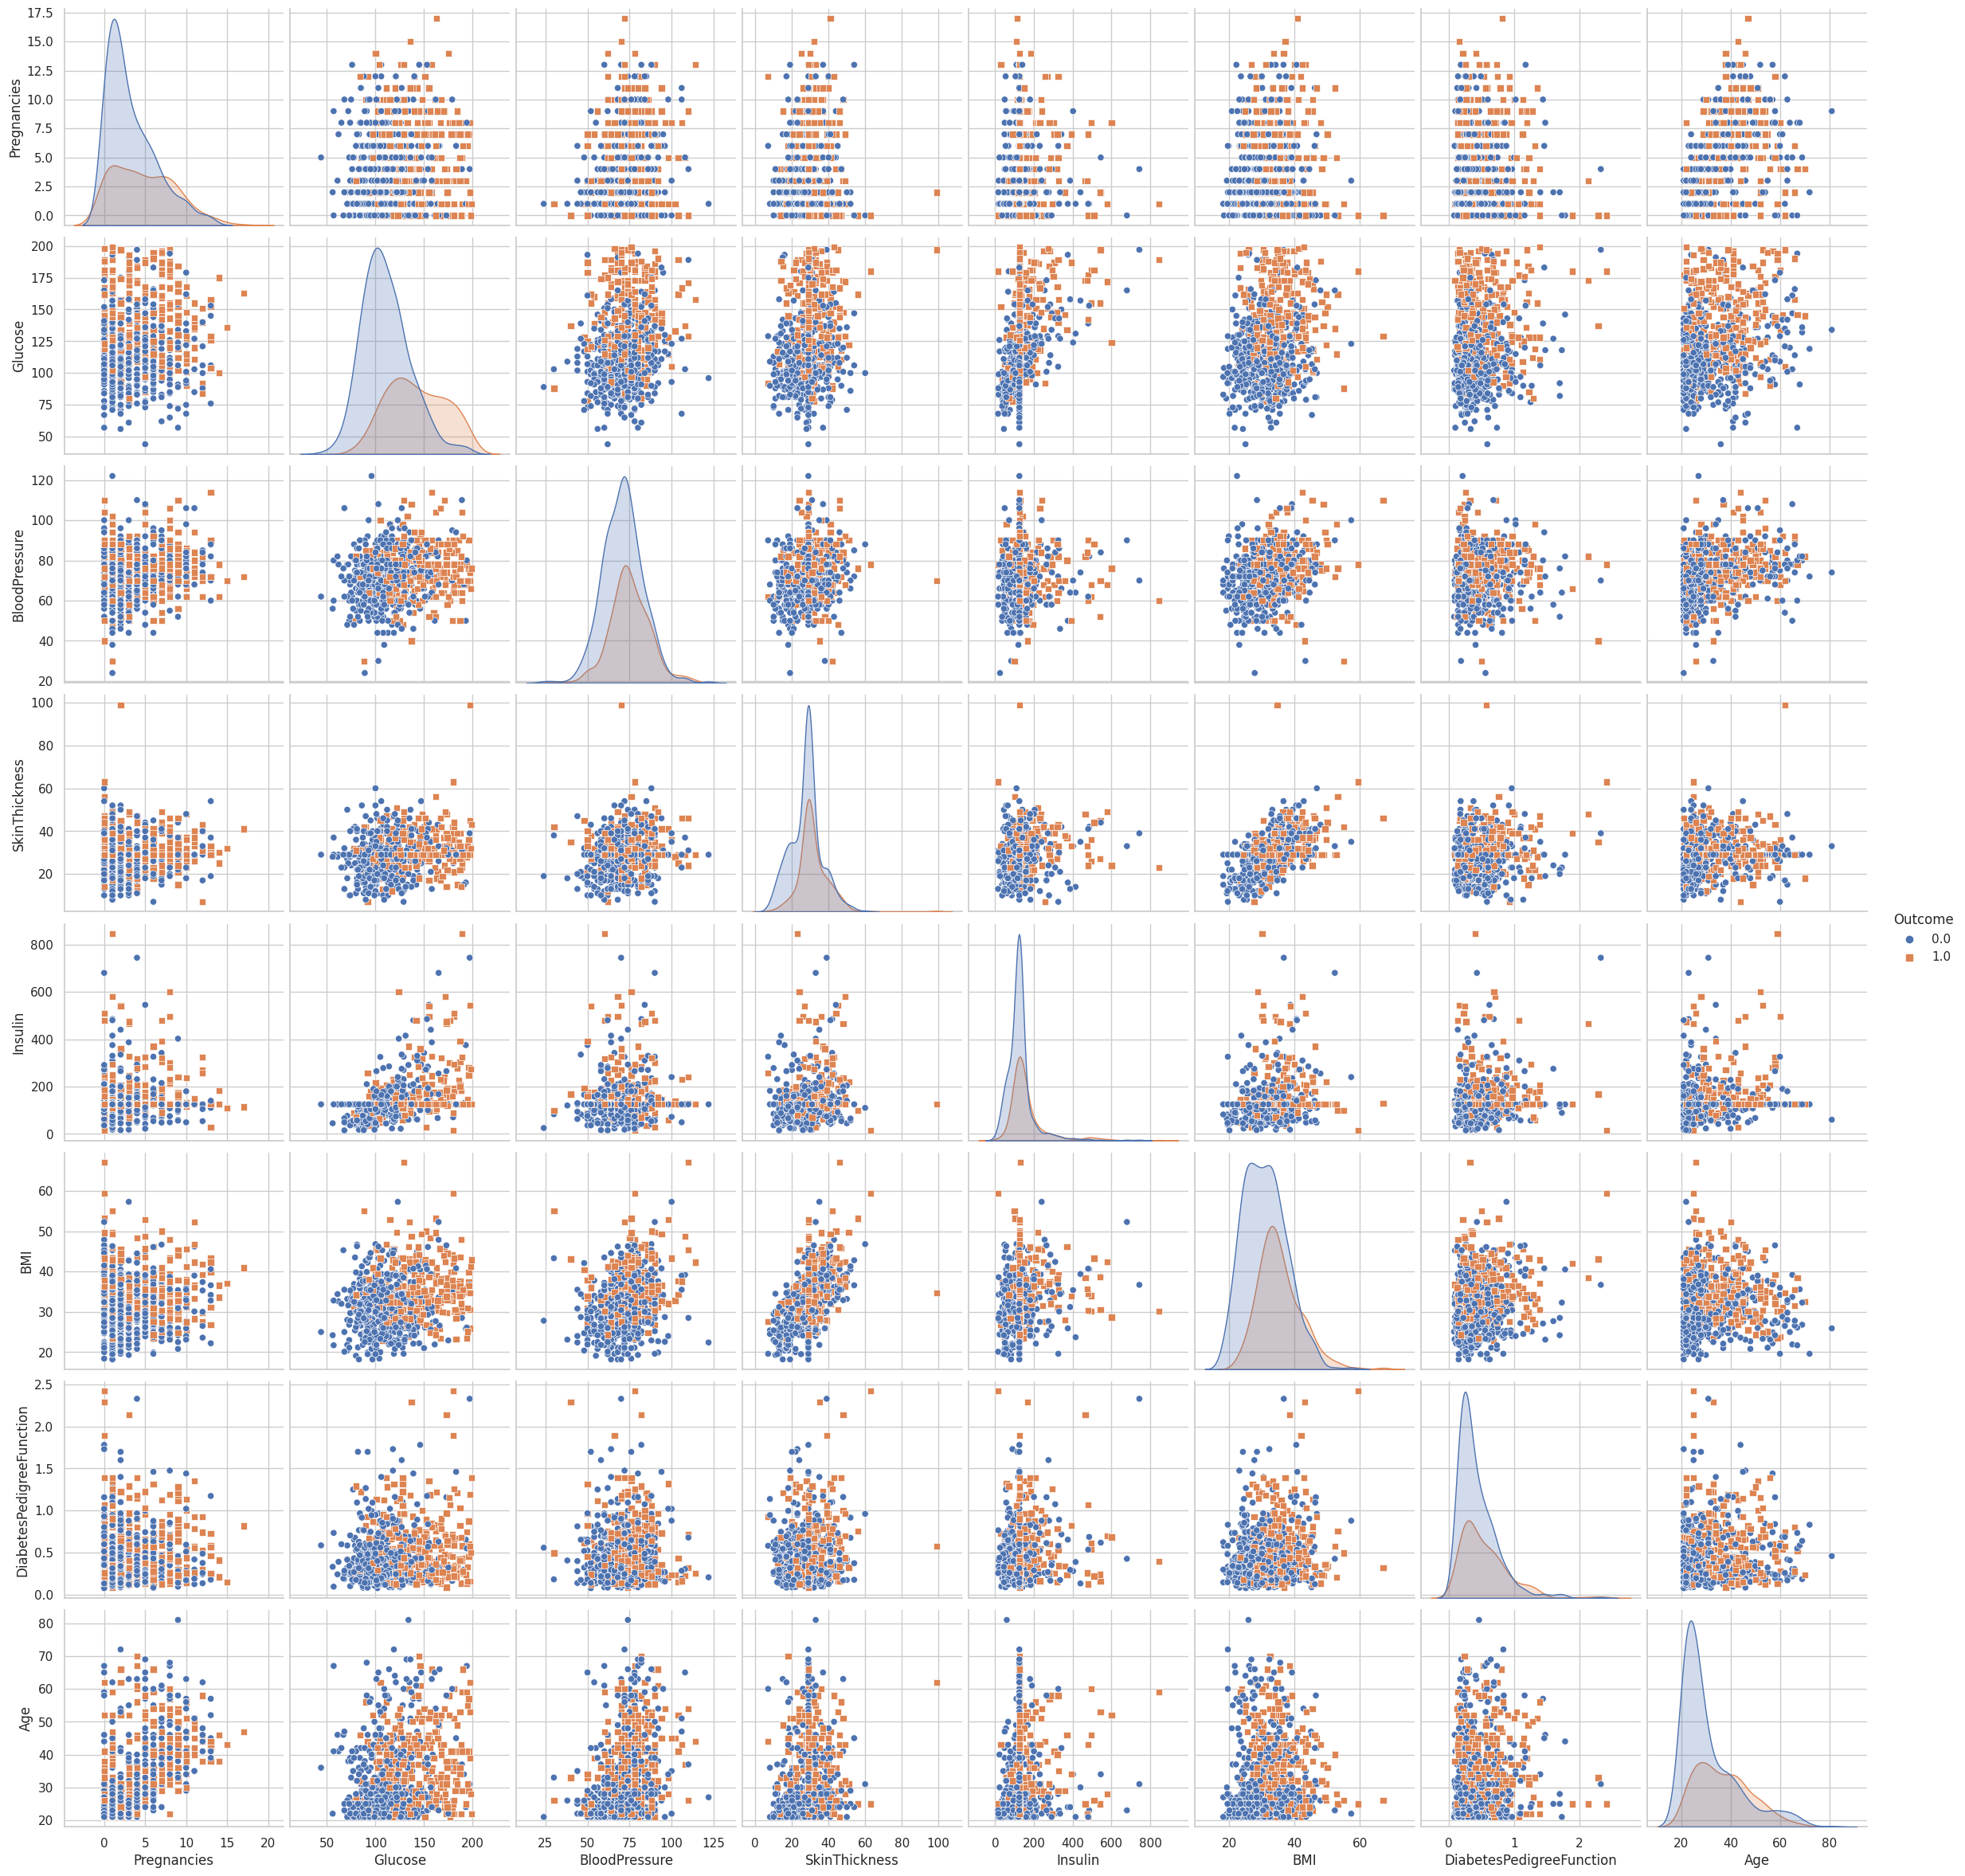

In [12]:
sns.set(style="whitegrid")

# Create a pairplot
sns.pairplot(df, hue='Outcome', markers=['o', 's'], diag_kind='kde', height=3)

# Show the plot
plt.show()

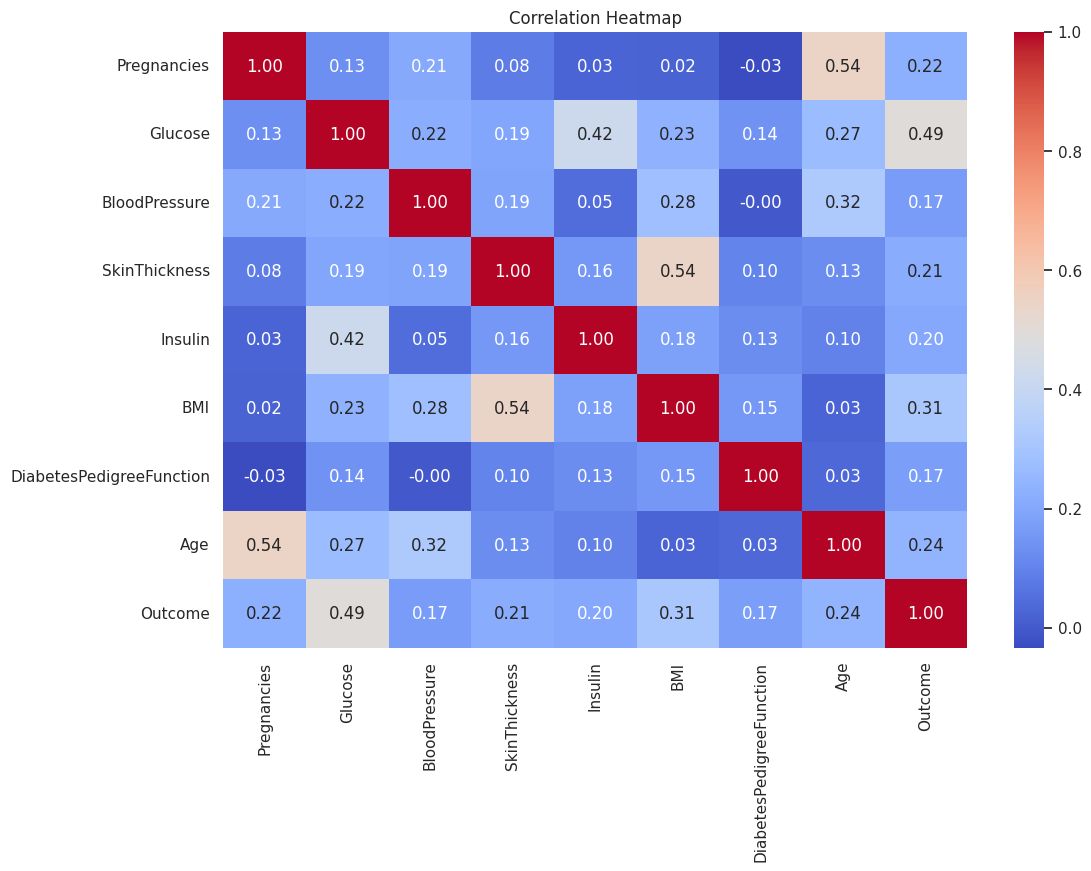

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression:
Mean AUC: 0.8414, Standard Deviation: 0.0196

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       100
         1.0       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154


Logistic Regression Confusion Matrix:
[[85 15]
 [24 30]]


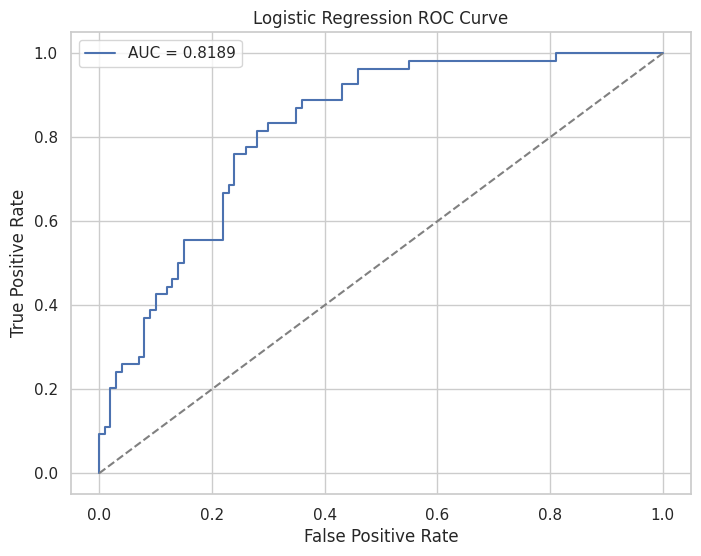


SVM:
Mean AUC: 0.8243, Standard Deviation: 0.0270

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       100
         1.0       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154


SVM Confusion Matrix:
[[87 13]
 [30 24]]


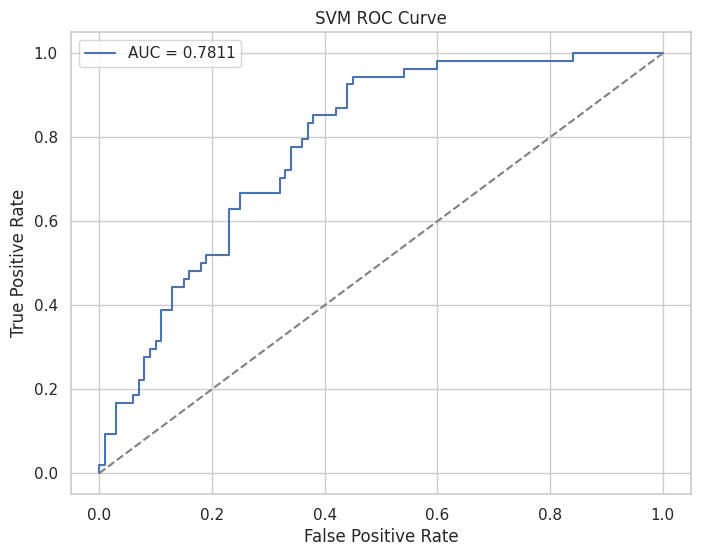


Random Forest:
Mean AUC: 0.8184, Standard Deviation: 0.0224

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       100
         1.0       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Random Forest Confusion Matrix:
[[88 12]
 [22 32]]


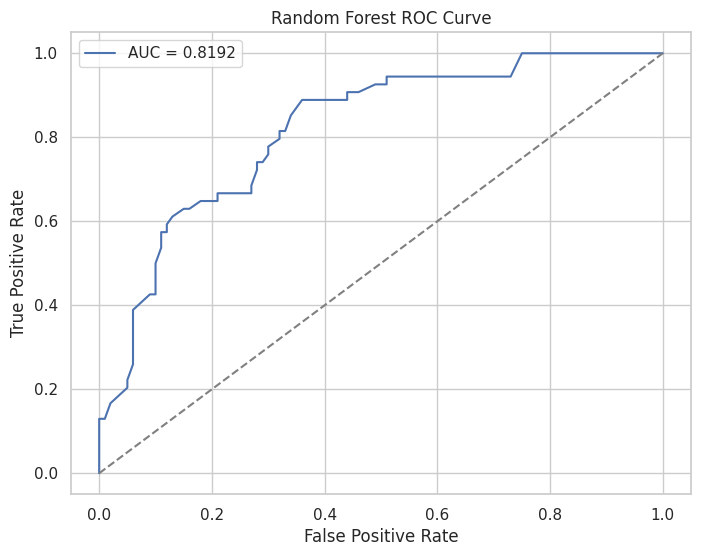


KNN:
Mean AUC: 0.7795, Standard Deviation: 0.0320

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       100
         1.0       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154


KNN Confusion Matrix:
[[77 23]
 [27 27]]


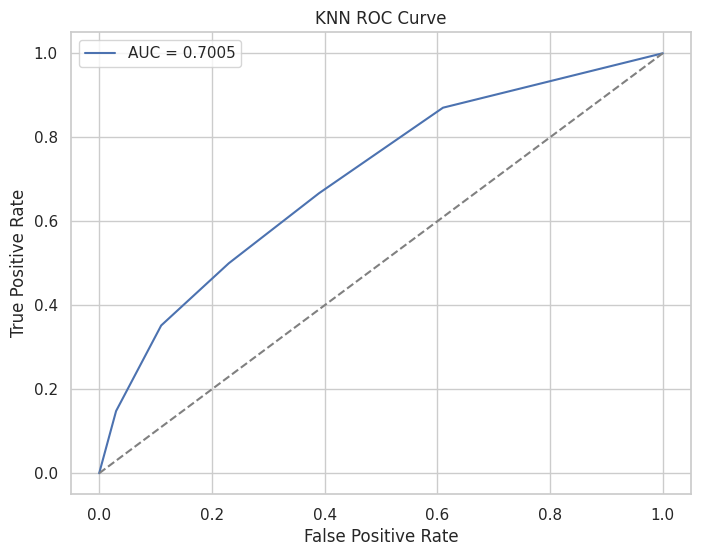

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'X' contains features and 'y' contains the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Initialize Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
for name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"\n{name}:\nMean AUC: {cv_scores.mean():.4f}, Standard Deviation: {cv_scores.std():.4f}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix
    print(f"\n{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.show()
